<a href="https://www.kaggle.com/code/tofunmiah/interpretive-multiplicity-adult-income?scriptVersionId=103079067" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Problem Statement

Given user data, we need to predict whether the individual will earn more than 50k . 
<b> Problem Type: Classification </b>

## About Dataset

US Adult Census data relating income to social factors such as Age, Education, race etc.

The Us Adult income dataset was extracted by Barry Becker from the 1994 US Census Database. The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more.
Each row is labelled as either having a salary greater than ">50K" or "<=50K".

This Data set is split into two CSV files, named adult-training.txt and adult-test.txt.

The goal here is to train a binary classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.

Note that the dataset is made up of categorical and continuous features. It also contains missing values
The categorical columns are: workclass, education, maritalstatus, occupation, relationship, race, gender, nativecountry

The continuous columns are: age, educationnum, capitalgain, capitalloss, hoursper_week

Kaggle Dataset Link: https://www.kaggle.com/datasets/johnolafenwa/us-census-data


UCI Repository Link: https://archive.ics.uci.edu/ml/datasets/census+income,
http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/ 

I have uploaded the dataset in github also for direct access in colab, or any notebooks.

Github : https://raw.githubusercontent.com/syedjafer/datasets/main/adult_data.csv


## Imports and Helpers 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
train_df = pd.read_csv('https://raw.githubusercontent.com/syedjafer/datasets/main/adult-training.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/syedjafer/datasets/main/adult-test.csv')
add_on_df = pd.read_csv('../input/2020-census-data/2020_ASEC_version2.csv')

### Getting to know more about data - Train/Test

In [4]:
train_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
datasets = [train_df, test_df]
df = pd.concat(datasets)

It seems its not having column names. So after searching internet got the values from this site, https://archive.ics.uci.edu/ml/datasets/census+income

**Column Name: Continous / Categorical**
1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. ducation: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. 'Above/Below 50K': Categorical - <=50k, >50K

In [6]:
# Defining the column names. 
columns = ['Age','Workclass','fnlgwt','Education','Education Num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Country','Above/Below 50K',]

In [7]:
# Reading the datasets again
train_df = pd.read_csv('https://raw.githubusercontent.com/syedjafer/datasets/main/adult-training.csv', names=columns)
test_df = pd.read_csv('https://raw.githubusercontent.com/syedjafer/datasets/main/adult-test.csv', names=columns)

In [8]:
train_df

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
add_on_cols = ['Age','Workclass','fnlgwt','Education','Education Num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain',
           'Hours/Week','Country','Capital Loss','Above/Below 50K','income-90k-threshold']
add_on_df = pd.read_csv('../input/2020-census-data/2020_ASEC_version2.csv', names = add_on_cols)

add_on_df.drop('income-90k-threshold',axis=1, inplace=True)
add_on_df.drop(0, inplace=True)
add_on_df.reset_index(drop=True,inplace=True)

add_on_df.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Hours/Week,Country,Capital Loss,Above/Below 50K
0,63,State-gov,166860,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,40,United-States,22,>50k
1,64,Local-gov,111745,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,40,United-States,18,<=50k
2,54,Private,151825,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,44,United-States,17,<=50k
3,37,Private,174690,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,21,United-States,4,<=50k
4,35,Private,197229,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,40,United-States,18,<=50k


In [10]:
add_on_df['Education Num'] = pd.to_numeric(add_on_df['Education Num'])
add_on_df['Hours/Week'] = pd.to_numeric(add_on_df['Hours/Week'])

add_on_df.dtypes

Age                object
Workclass          object
fnlgwt             object
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain       object
Hours/Week          int64
Country            object
Capital Loss       object
Above/Below 50K    object
dtype: object

In [11]:
datasets = [train_df, test_df, add_on_df]
df = pd.concat(datasets)

In [12]:
df.isnull().sum()

Age                0
Workclass          1
fnlgwt             1
Education          1
Education Num      1
Marital Status     1
Occupation         1
Relationship       1
Race               1
Sex                1
Capital Gain       1
Capital Loss       1
Hours/Week         1
Country            1
Above/Below 50K    1
dtype: int64

We are having a single nan row, that is affecting 

We can remove that row. since only age is available in that row. 

In [13]:
df[df.isna().any(axis=1)]

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50K
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Age                0
Workclass          0
fnlgwt             0
Education          0
Education Num      0
Marital Status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital Gain       0
Capital Loss       0
Hours/Week         0
Country            0
Above/Below 50K    0
dtype: int64

Correcting the column names

In [16]:
df.columns = [ column.lower().replace(" ", "_").replace("/", "_") for column in df.columns ]

In [17]:
df.columns

Index(['age', 'workclass', 'fnlgwt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_week', 'country',
       'above_below_50k'],
      dtype='object')

In [18]:
# Datatypes of each column
df.dtypes

age                 object
workclass           object
fnlgwt              object
education           object
education_num      float64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
capital_gain        object
capital_loss        object
hours_week         float64
country             object
above_below_50k     object
dtype: object

## Data Cleaning

### Column: Age

In [19]:
df.age.values

array([39, 50, 38, ..., 31, 57, 32], dtype=object)

In [20]:
add_on_df.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Hours/Week,Country,Capital Loss,Above/Below 50K
0,63,State-gov,166860,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,40,United-States,22,>50k
1,64,Local-gov,111745,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,40,United-States,18,<=50k
2,54,Private,151825,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,44,United-States,17,<=50k
3,37,Private,174690,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,21,United-States,4,<=50k
4,35,Private,197229,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,40,United-States,18,<=50k


In [21]:
# checking if there are any values other than integers
for i,age in enumerate(df.age.values):
  try: 
    _ = int(age)
  except Exception as e:
    print(i, age)

In [22]:
df['age'] = pd.to_numeric(df.age)

In [23]:
# Convertion of the continous variables to categorical 
bins= [14,20,30,40,50,60, 70, 80, 90]
labels = ['10s','20s','30s','40s','50s','60s','70s','80s']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels)

In [24]:
df['age'] = pd.Categorical(df.age)

In [25]:
# Defining Function for Age column
def handle_age(df):
  df['age'] = pd.to_numeric(df.age)
  bins= [14,20,30,40,50,60, 70, 80, 90]
  labels = ['10s','20s','30s','40s','50s','60s','70s','80s']
  df['age'] = pd.cut(df['age'], bins=bins, labels=labels)
  df['age'].fillna('unknown', inplace=True)
  df['age'] = pd.Categorical(df.age)

### Column: Work Class

In [26]:
df['workclass'].value_counts()

 Private             33906
Private              27303
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
?                     2319
Local-gov             2319
Self-emp-not-inc      2281
 State-gov            1981
State-gov             1840
 Self-emp-inc         1695
 Federal-gov          1432
Self-emp-inc          1407
Federal-gov           1092
 Without-pay            21
Without-pay             12
 Never-worked           10
Never-worked             3
Name: workclass, dtype: int64

In [27]:
df['workclass'] = np.where(df['workclass'] == ' ?', ' Missing', df['workclass'])

In [28]:
df['workclass'].value_counts()

 Private             33906
Private              27303
 Self-emp-not-inc     3862
 Local-gov            3136
 Missing              2799
?                     2319
Local-gov             2319
Self-emp-not-inc      2281
 State-gov            1981
State-gov             1840
 Self-emp-inc         1695
 Federal-gov          1432
Self-emp-inc          1407
Federal-gov           1092
 Without-pay            21
Without-pay             12
 Never-worked           10
Never-worked             3
Name: workclass, dtype: int64

In [29]:
df.workclass = df.workclass.astype('category')

### Column: fnlgwt

In [30]:
df['fnlgwt']

0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
38571    180857
38572    117245
38573    126498
38574     72015
38575     94815
Name: fnlgwt, Length: 87418, dtype: object

fnlgwt - means: Final Weight. 
final weight. In other words, this is the number of people the census believes 
the entry represents..  
○ Integer greater than 0 

Resource: https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

Since this is not having any predictive power, we can remove this column

In [31]:
del df['fnlgwt']

In [32]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,country,above_below_50k
0,30s,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,40s,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,30s,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,50s,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,20s,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


### Column Education/Education num

In [33]:
del df['education']

In [34]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,country,above_below_50k
0,30s,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,40s,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,30s,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,50s,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,20s,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


### Column: Occupation

In [35]:
df['occupation'] = np.where(df['occupation'] == ' ?', 'Missing', df['occupation'])

### Column: Race

Since this column is highly imbalanced, we can remove this column

In [36]:
del df['race']

In [37]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_week,country,above_below_50k
0,30s,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40.0,United-States,<=50K
1,40s,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13.0,United-States,<=50K
2,30s,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40.0,United-States,<=50K
3,50s,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40.0,United-States,<=50K
4,20s,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40.0,Cuba,<=50K


### Column: Capital Gain/Loss

In [38]:
del df['capital_gain']
del df['capital_loss']

In [39]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,sex,hours_week,country,above_below_50k
0,30s,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,Male,40.0,United-States,<=50K
1,40s,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,Male,13.0,United-States,<=50K
2,30s,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,40.0,United-States,<=50K
3,50s,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,40.0,United-States,<=50K
4,20s,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Female,40.0,Cuba,<=50K


### Column: above_below_50k - (Predict)

In [40]:
df['above_below_50k'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.', '>50k', '<=50k'],
      dtype=object)

Here we can see some items having same value, but with an extra dot. So we can replace them 

In [41]:
df['above_below_50k'] = np.where(df['above_below_50k'] == ' <=50K.', ' <=50K', df['above_below_50k'])

In [42]:
df['above_below_50k'] = np.where(df['above_below_50k'] == ' >50K.', ' >50K', df['above_below_50k'])

In [43]:
df['above_below_50k'].unique()

array([' <=50K', ' >50K', '>50k', '<=50k'], dtype=object)

So far, we have seen the cleaning of the dataset now we can see the comparison of the indivual column with salary 

## Comparison with above_below_50k

### Education_num vs above_below_50k

In [44]:
edu_nums = sorted(df['education_num'].unique().tolist())
edu_nums

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0]

In [45]:
below_50k = []
above_50k = []
for edu_num in edu_nums:
    val = df[df.education_num==edu_num].above_below_50k.value_counts().sort_index()
    below_50k.append(val.get(' <=50K', 0))
    above_50k.append(val.get(' >50K', 0))

### hours_week vs above_below_50k

In [46]:
df.hours_week.mean()

39.62852044201423

In [47]:
# With 40hrs work week
hours_group = []
for hour in df.hours_week:
    if hour < 40:
        hours_group.append('<40')
    elif hour == 40:
        hours_group.append('40')
    elif hour > 40:
        hours_group.append('>40')
        
        

In [48]:
df['week_hours_group'] = hours_group

In [49]:
week_hours_list = df['week_hours_group'].unique().tolist()

In [50]:
below_50k = []
above_50k = []
for wh in week_hours_list:
    val = df[df.week_hours_group==wh].above_below_50k.value_counts().sort_index()
    below_50k.append(val.get(' <=50K', 0))
    above_50k.append(val.get(' >50K', 0))

### country vs above_below_50k

In [51]:
df['country'].value_counts()

 United-States         43832
United-States          32993
Mexico                  1310
 Mexico                  951
 ?                       857
                       ...  
Zambia                     1
Lithuania                  1
Czechoslovakia             1
 Holand-Netherlands        1
Marshall-Islands           1
Name: country, Length: 199, dtype: int64

Since this data is based on US survey, we can split the data into 2 categories. 

1. US
2. Not US

In [52]:
countries = []
for country in df.country:
    if country == ' United-States':
        countries.append('US')
    else:
        countries.append('Not US')

In [53]:
df['countries_group'] = countries

In [54]:
cg_list = df.countries_group.unique().tolist()

In [55]:
cg_list

['US', 'Not US']

In [56]:
below_50k = []
above_50k = []
for cg in cg_list:
    val = df[df.countries_group==cg].above_below_50k.value_counts().sort_index()
    below_50k.append(val.get(' <=50K', 0))
    above_50k.append(val.get(' >50K', 0))

### Inference from comparison

In [57]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,sex,hours_week,country,above_below_50k,week_hours_group,countries_group
0,30s,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,Male,40.0,United-States,<=50K,40,US
1,40s,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,Male,13.0,United-States,<=50K,<40,US
2,30s,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,40.0,United-States,<=50K,40,US
3,50s,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,40.0,United-States,<=50K,40,US
4,20s,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Female,40.0,Cuba,<=50K,40,Not US


We can consider the group, 
1. age
2. workclass
3. education_num
4. marital_status
5. occupation
6. sex,
7. week_hours_group
8. countries_group

In [58]:
columns = ['age', 'workclass', 'education_num', 'marital_status', 'occupation', 'sex', 'week_hours_group', 'countries_group', 'above_below_50k']


In [59]:
filtered_df = df[columns]

In [60]:
filtered_df

,age,workclass,education_num,marital_status,occupation,sex,week_hours_group,countries_group,above_below_50k
0,30s,State-gov,13.0,Never-married,Adm-clerical,Male,40,US,<=50K
1,40s,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Male,<40,US,<=50K
2,30s,Private,9.0,Divorced,Handlers-cleaners,Male,40,US,<=50K
3,50s,Private,7.0,Married-civ-spouse,Handlers-cleaners,Male,40,US,<=50K
4,20s,Private,13.0,Married-civ-spouse,Prof-specialty,Female,40,Not US,<=50K
...,...,...,...,...,...,...,...,...,...
38571,40s,Private,9.0,Married-civ-spouse,Exec-managerial,Male,40,Not US,>50k
38572,50s,Private,9.0,Married-civ-spouse,Transport-moving,Male,>40,Not US,>50k
38573,30s,Private,9.0,Never-married,Other-service,Female,40,Not US,<=50k
38574,50s,Private,13.0,Divorced,Transport-moving,Female,>40,Not US,>50k


In [61]:
filtered_df.dtypes

age                 category
workclass           category
education_num        float64
marital_status        object
occupation            object
sex                   object
week_hours_group      object
countries_group       object
above_below_50k       object
dtype: object

In [62]:
filtered_df['marital_status'] = filtered_df['marital_status'].astype('category')
filtered_df['occupation'] = filtered_df['occupation'].astype('category')
filtered_df['sex'] = filtered_df['sex'].astype('category')
filtered_df['week_hours_group'] = filtered_df['week_hours_group'].astype('category')
filtered_df['countries_group'] = filtered_df['countries_group'].astype('category')
filtered_df['above_below_50k'] = filtered_df['above_below_50k'].astype('category')

In [63]:
filtered_df.dtypes

age                 category
workclass           category
education_num        float64
marital_status      category
occupation          category
sex                 category
week_hours_group    category
countries_group     category
above_below_50k     category
dtype: object

In [64]:
string_types = ['age', 'workclass', 'marital_status', 'occupation', 'sex', 'week_hours_group', 
               'countries_group']

In [65]:
data = pd.get_dummies(filtered_df, columns=string_types)

In [66]:
data.head()

,education_num,above_below_50k,age_10s,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_80s,...,occupation_Transport-moving,sex_ Female,sex_ Male,sex_Female,sex_Male,week_hours_group_40,week_hours_group_<40,week_hours_group_>40,countries_group_Not US,countries_group_US
0,13.0,<=50K,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,13.0,<=50K,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,9.0,<=50K,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,7.0,<=50K,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,13.0,<=50K,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [67]:
data['above_below_50k'] = np.where(df['above_below_50k'] == ' >50K', 1, 0)

In [68]:
data.head()

,education_num,above_below_50k,age_10s,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_80s,...,occupation_Transport-moving,sex_ Female,sex_ Male,sex_Female,sex_Male,week_hours_group_40,week_hours_group_<40,week_hours_group_>40,countries_group_Not US,countries_group_US
0,13.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,13.0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,9.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,7.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,13.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


Now the dataset is ready, 

we can split the dataset back to train and test

In [69]:
data.shape

(87418, 78)

In [70]:
train = data[:32561]
test = data[32562:48842]
add_on = data[48842:]

print(len(train), len(test),len(add_on), len(train_df), len(test_df),len(add_on_df) )

32561 16280 38576 32561 16282 38576


## Model Creation

In [71]:
train.columns

Index(['education_num', 'above_below_50k', 'age_10s', 'age_20s', 'age_30s',
       'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_80s',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Missing',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital_status_ Divorced',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'marital_status_Divorced',
       'marital_status_Married-AF-spouse', 'marital_status_Married-c

In [72]:
input_columns = ['education_num', 'age_10s', 'age_20s', 'age_30s',
       'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_80s',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Missing',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'occupation_Missing', 'sex_ Female',
       'sex_ Male', 'week_hours_group_40', 'week_hours_group_<40',
       'week_hours_group_>40', 'countries_group_Not US', 'countries_group_US']
output_columns = ['above_below_50k']

In [73]:
X_train = train[input_columns]
y_train = train['above_below_50k']

X_test = test[input_columns]
y_test = test['above_below_50k']

X_add_on = add_on[input_columns]
y_add_on = add_on['above_below_50k']

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_train, logreg.predict(X_train))))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Accuracy Score: 0.8357237185590123
Accuracy Score: 0.8388206388206388
Confusion Matrix:
 [[11508   926]
 [ 1698  2148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     12434
           1       0.70      0.56      0.62      3846

    accuracy                           0.84     16280
   macro avg       0.79      0.74      0.76     16280
weighted avg       0.83      0.84      0.83     16280



In [76]:
y_add_on_pred = logreg.predict(X_add_on)
print("Accuracy Score: {}".format(accuracy_score(y_add_on, y_add_on_pred)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_add_on, y_add_on_pred)))
print("Classification Report:\n {}".format(classification_report(y_add_on, y_add_on_pred)))


Accuracy Score: 0.7649056408129407
Confusion Matrix:
 [[29507  9069]
 [    0     0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.87     38576
           1       0.00      0.00      0.00         0

    accuracy                           0.76     38576
   macro avg       0.50      0.38      0.43     38576
weighted avg       1.00      0.76      0.87     38576



#### Multinomial Naive Bayes

In [77]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_train, mnb.predict(X_train))))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Accuracy Score: 0.8071005190258285
Accuracy Score: 0.807002457002457
Confusion Matrix:
 [[10560  1874]
 [ 1268  2578]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87     12434
           1       0.58      0.67      0.62      3846

    accuracy                           0.81     16280
   macro avg       0.74      0.76      0.75     16280
weighted avg       0.82      0.81      0.81     16280



In [78]:
y_add_on_pred = mnb.predict(X_add_on)
print("Accuracy Score: {}".format(accuracy_score(y_add_on, y_add_on_pred)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_add_on, y_add_on_pred)))
print("Classification Report:\n {}".format(classification_report(y_add_on, y_add_on_pred)))


Accuracy Score: 0.8629199502281211
Confusion Matrix:
 [[33288  5288]
 [    0     0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93     38576
           1       0.00      0.00      0.00         0

    accuracy                           0.86     38576
   macro avg       0.50      0.43      0.46     38576
weighted avg       1.00      0.86      0.93     38576



#### Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_train, dtc.predict(X_train))))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Accuracy Score: 0.8935843493750192
Accuracy Score: 0.8125307125307125
Confusion Matrix:
 [[11148  1286]
 [ 1766  2080]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     12434
           1       0.62      0.54      0.58      3846

    accuracy                           0.81     16280
   macro avg       0.74      0.72      0.73     16280
weighted avg       0.81      0.81      0.81     16280



In [80]:
y_add_on_pred = dtc.predict(X_add_on)
print("Accuracy Score: {}".format(accuracy_score(y_add_on, y_add_on_pred)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_add_on, y_add_on_pred)))
print("Classification Report:\n {}".format(classification_report(y_add_on, y_add_on_pred)))

Accuracy Score: 0.9560089174616342
Confusion Matrix:
 [[36879  1697]
 [    0     0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     38576
           1       0.00      0.00      0.00         0

    accuracy                           0.96     38576
   macro avg       0.50      0.48      0.49     38576
weighted avg       1.00      0.96      0.98     38576



#### LightGBM

In [81]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_train, lgbm.predict(X_train))))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Accuracy Score: 0.8493596634010012
Accuracy Score: 0.842997542997543
Confusion Matrix:
 [[11460   974]
 [ 1582  2264]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     12434
           1       0.70      0.59      0.64      3846

    accuracy                           0.84     16280
   macro avg       0.79      0.76      0.77     16280
weighted avg       0.84      0.84      0.84     16280



In [82]:
y_add_on_pred = lgbm.predict(X_add_on)
print("Accuracy Score: {}".format(accuracy_score(y_add_on, y_add_on_pred)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_add_on, y_add_on_pred)))
print("Classification Report:\n {}".format(classification_report(y_add_on, y_add_on_pred)))

Accuracy Score: 0.9833056822895064
Confusion Matrix:
 [[37932   644]
 [    0     0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     38576
           1       0.00      0.00      0.00         0

    accuracy                           0.98     38576
   macro avg       0.50      0.49      0.50     38576
weighted avg       1.00      0.98      0.99     38576



### Model Comparison 
| Algorithm |  Accuracy |
|---|---|
| Logistic Regression  | 0.8388206388206388  |
| Multinomial Naive Bayes  | 0.807002457002457  |
| DecisionTreeClassifier  |  0.8116707616707617 |
| LightGBM | 0.842997542997543 |


In [83]:
models = [logreg,mnb,dtc,lgbm]

rfc takes 40mins on average to train so we skip this one  (cannot stop excution without stop session)  
etc takes 50mins on average to train so we skip this one   
abc take 1hr to train on average so we skip this one 

## Explanations

In [84]:
import shap 

def get_shap_vals(model):
    try:
        exp = shap.Explainer(model,X_train)
    except TypeError:
        print("predict_proba used")
        exp = shap.Explainer(model.predict_proba,X_train)
    shap_vals = exp(X_test)
    return shap_vals

In [85]:
shap_vals = np.empty((len(models), *X_test.shape))
for i,model in enumerate(models):
    print(i)
    model_shap_vals = get_shap_vals(model).values 
    try:
        shap_vals[i] = model_shap_vals
    except ValueError:
        print("2 sets of values generated")
        shap_vals[i] = model_shap_vals[...,1]

0
1
2


 97%|=================== | 31716/32560 [00:21<00:00]       

2 sets of values generated
3


100%|===================| 16239/16280 [01:03<00:00]       

In [86]:
shap_vals

array([[[-2.17274879e-01,  2.06698986e-01,  1.93372520e-01, ...,
         -1.16027509e-01,  1.24967473e-01, -9.70638699e-02],
        [ 6.51824637e-01,  2.06698986e-01, -5.22821998e-01, ...,
          5.71478777e-02,  1.24967473e-01, -9.70638699e-02],
        [ 7.24249597e-02,  2.06698986e-01,  1.93372520e-01, ...,
          5.71478777e-02,  1.24967473e-01, -9.70638699e-02],
        ...,
        [ 9.41524476e-01,  2.06698986e-01,  1.93372520e-01, ...,
         -1.16027509e-01,  1.24967473e-01, -9.70638699e-02],
        [ 9.41524476e-01,  2.06698986e-01,  1.93372520e-01, ...,
          5.71478777e-02,  1.24967473e-01, -9.70638699e-02],
        [ 9.41524476e-01,  2.06698986e-01,  1.93372520e-01, ...,
         -1.16027509e-01,  1.24967473e-01, -9.70638699e-02]],

       [[ 3.54067227e-01,  8.63409557e-01,  1.44927075e+00, ...,
         -2.43450315e+00,  5.92070888e-01, -3.31462111e-01],
        [-1.06220168e+00,  8.63409557e-01, -3.91839870e+00, ...,
          1.19908364e+00,  5.92070888e

In [87]:
def shap_similarity(epsilon=0.15, normalize=True, measure="T", verbose=1):
    sim_matrix = np.zeros([len(models),len(models)])
    for i in range(len(models)-1):
        for j in range(i+1,len(models)):
            shap_vals1 = shap_vals[i]
            shap_vals2 = shap_vals[j]
            if measure == "S":
                similarity = np.count_nonzero(np.abs(shap_vals1-shap_vals2) < epsilon) 
                if normalize:
                    similarity /= np.prod(shap_vals1.shape) 
            elif measure == "S_delta":
                similarity = np.count_nonzero(np.sum(np.abs(shap_vals1-shap_vals2),axis=1)<epsilon*shap_vals1.shape[1])
                if normalize:
                    similarity /= shap_vals1.shape[0]
            elif measure == "T":
                similarity = np.sum(np.abs(shap_vals1-shap_vals2))
                if normalize:
                    similarity /= np.prod(shap_vals1.shape) 
            else:
                similarity = np.count_nonzero(np.max(np.abs(shap_vals1-shap_vals2),axis=1)<epsilon)
                if normalize:
                    similarity /= shap_vals1.shape[0]
            if verbose:
                print(str(models[i])[:120],"vs",str(models[j])[:120],similarity, sep="\n", end="\n\n")
            sim_matrix[i,j] = sim_matrix[j, i] = similarity    
    return np.sum(sim_matrix,axis=0) / (len(models)-1)

In [88]:
shap_similarity()

LogisticRegression()
vs
MultinomialNB()
0.8469808385319372

LogisticRegression()
vs
DecisionTreeClassifier()
0.1286792008962299

LogisticRegression()
vs
LGBMClassifier()
0.09324500155134041

MultinomialNB()
vs
DecisionTreeClassifier()
0.9013212357886253

MultinomialNB()
vs
LGBMClassifier()
0.9106417124569886

DecisionTreeClassifier()
vs
LGBMClassifier()
0.0828233449121595



array([0.35630168, 0.8863146 , 0.37094126, 0.36223669])

In [89]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="whitegrid")

In [90]:
def plot_sim(epsilons,sig_level_name = "delta"):
    rows = [[epsilon]+list(shap_similarity(epsilon, verbose=0)) for epsilon in epsilons]

    cols = [sig_level_name,"logreg","mnb","dtc","lgbm"]
    sims_df = pd.DataFrame(rows,columns=cols)
    sim_fig = sns.lineplot(x="delta", y="value", hue="variable", style ="variable", markers=True, data=pd.melt(sims_df,["delta"]))
    sim_fig.set_ylabel("average similarity coefficient")

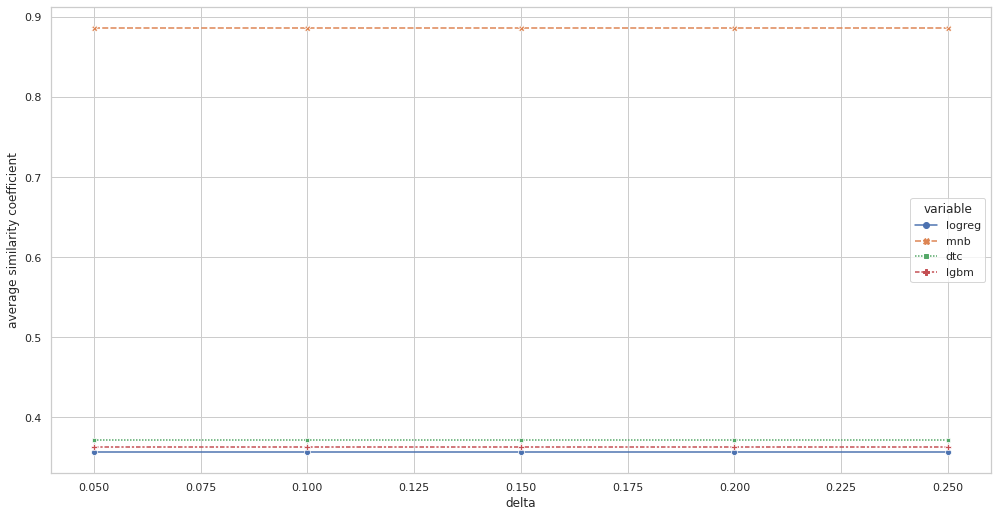

In [91]:
plot_sim([0.05,0.1,0.15,0.2,0.25])

In [92]:
def shap_conflict(alpha=3,normalize=True,measure="F", verbose = 1):
    conf_matrix = np.zeros([len(models),len(models)])
    for i in range(len(models)-1):
        for j in range(i+1,len(models)):
            shap_vals1 = shap_vals[i]
            shap_vals2 = shap_vals[j]
            conf_cond = shap_vals1*shap_vals2<0
            dist_cond = np.abs(shap_vals1-shap_vals2)> alpha
            satifies_conditions = np.logical_and(dist_cond,conf_cond)
            if measure == "F":
                conflict = np.sum(satifies_conditions)
                if normalize:
                    conflict /= np.prod(shap_vals1.shape)
            elif measure == "C":
                conflict = np.count_nonzero(np.max(satifies_conditions, axis=1))
                if normalize:
                    conflict /= shap_vals1.shape[0]
            if verbose:
                print(str(models[i])[:120],"vs",str(models[j])[:120],conflict, sep="\n", end="\n\n")
            conf_matrix[i,j] = conf_matrix[j, i] = conflict    
    return np.sum(conf_matrix,axis=0) / (len(models)-1)

In [93]:
shap_conflict()

LogisticRegression()
vs
MultinomialNB()
0.027504051440221652

LogisticRegression()
vs
DecisionTreeClassifier()
0.0

LogisticRegression()
vs
LGBMClassifier()
0.0

MultinomialNB()
vs
DecisionTreeClassifier()
0.03368968581734539

MultinomialNB()
vs
LGBMClassifier()
0.030964765539233625

DecisionTreeClassifier()
vs
LGBMClassifier()
9.148413403732553e-06



array([0.00916802, 0.0307195 , 0.01123294, 0.01032464])

In [94]:
def plot_conf(epsilons,sig_level_name = "alpha"):
    rows = [[epsilon]+list(shap_conflict(epsilon, verbose=0)) for epsilon in epsilons]

    cols = [sig_level_name,"logreg","mnb","dtc","lgbm"]
    sims_df = pd.DataFrame(rows,columns=cols)
    sim_fig = sns.lineplot(x=sig_level_name, y="value", hue="variable", style ="variable", markers=True, data=pd.melt(sims_df,[sig_level_name]))
    sim_fig.set_ylabel("average conflict coefficient")

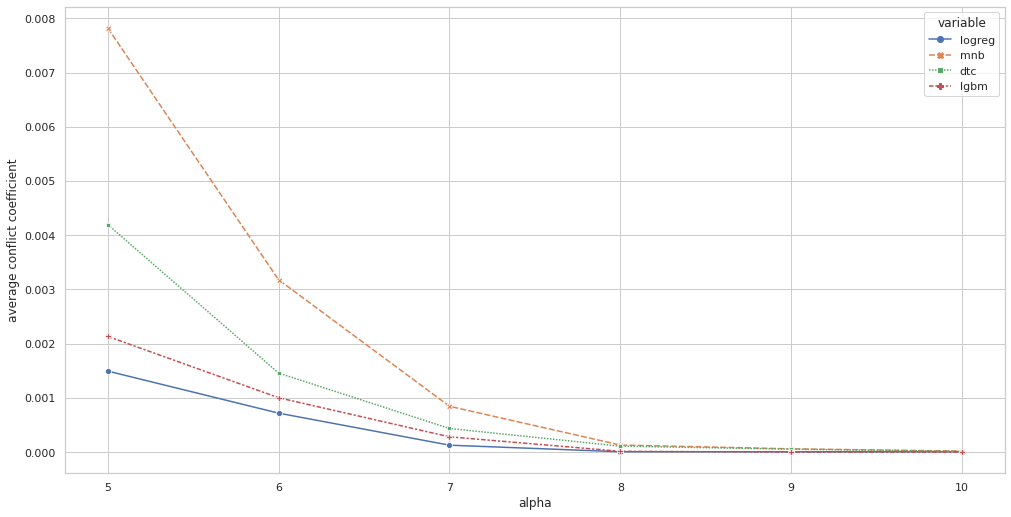

In [95]:
plot_conf([5,6,7,8,9,10])

### Generlisation hypothesis summary

generally correct when disregarding the mnb


| Algorithm |  Accuracy |
|---|---|
| Logistic Regression  | 0.7647241808378267  |
| Multinomial Naive Bayes  | 0.8629199502281211  |
| DecisionTreeClassifier  |  0.9546090833678972 |
| LightGBM | 0.9833056822895064 |